# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls=pd.read_csv("/datasets/megaline_calls.csv")

df_internet=pd.read_csv("/datasets/megaline_internet.csv")

df_messages=pd.read_csv("/datasets/megaline_messages.csv")

df_plans=pd.read_csv("/datasets/megaline_plans.csv")

df_users=pd.read_csv("/datasets/megaline_users.csv")


# Introducción

Se analizará las diferencias que puedan existir en el comportamiento de consumo de los usuarios de dos tipos de planes telefonicos en prepago. Primeramente se explorarán los archivos para dar una rápida revisión y asegurar que los tipos de datos sean adecuados para los análisis posteriores.

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Informacion sobre tarifas:")
df_plans.info()


Informacion sobre tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print("Muestra DataFrame de tarifas:")
df_plans


Muestra DataFrame de tarifas:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Comentario 1

Este DataFrame contiene la informacion acerca de los planes que son dos; surf y ultimate. Se observa que tenemos 8 columnas de las cuales; 1 es texto, 5 númericas enteros y 2 númericas con decimal. Se renombrara la columna con el nombre del plan para futuros analisis

## Corregir datos

In [5]:
#Renombrar columna para futuro analisis
df_plans.columns=["messages_included","mb_per_month_included","minutes_included","usd_monthly_pay","usd_per_gb","usd_per_message","usd_per_minute","plan"]
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

In [6]:
#Agregar columna para GB
df_plans["gb_per_month_included"]=df_plans["mb_per_month_included"]/1024
df_plans["gb_per_month_included"]=df_plans["gb_per_month_included"].astype(int)
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Informacion sobre usuarios:")
df_users.info()

Informacion sobre usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
print("Muestra DataFrame de usuarios:")
df_users.head()


Muestra DataFrame de usuarios:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


##  Comentario 2

La columna "user_id" y "age" son de tipo entero, se convertira a string dado que solo nos proporcionan información, igual que las demas columnas.
La columna "churn_date" solo tenemos 34 valores no nulos, esto significa que solo 34 clientes han dado de baja el servicio.
Para la columnareg_date se convertira al formato to_datetime

### Corregir los datos

In [9]:
# Se convertiran los tipo entero a strings
df_users["user_id"]=df_users["user_id"].astype("str")
df_users["age"]=df_users["age"].astype("str")
print(df_users.dtypes)

user_id       object
first_name    object
last_name     object
age           object
city          object
reg_date      object
plan          object
churn_date    object
dtype: object


### Enriquecer los datos

In [10]:
#Convertir a formato to_datetime
df_users["reg_date"]=pd.to_datetime(df_users["reg_date"])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    object        
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 31.4+ KB


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Informacion sobre llamadas:")
df_calls.info()

Informacion sobre llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
print("Muestra DataFrame de llamadas:")
df_calls.head()

Muestra DataFrame de llamadas:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


## Comentario 3

La columna "user_id" esta como tipo entero, se convertira a string y la columna "duration" esta como tipo float,
se convertira a entero verificando primero si es posible dicha conversion. La duracion de la llamada se redondeara a su número superior inmediato.

### Corregir los datos

In [13]:
#Comprobar si se puede convertir float a int
print(np.array_equal(df_calls["duration"],df_calls["duration"].astype(int)))
#Convertir int a string
df_calls["user_id"]=df_calls["user_id"].astype("str")
#Convertir de string a int
print(df_calls.dtypes)

False
id            object
user_id       object
call_date     object
duration     float64
dtype: object


### Enriquecer los datos

In [14]:
#Convertir "call_date" a fomrmato fecha
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])
#Convertir fecha
df_calls["month"]=df_calls["call_date"].dt.month
print(df_calls)

              id user_id  call_date  duration  month
0        1000_93    1000 2018-12-27      8.52     12
1       1000_145    1000 2018-12-27     13.66     12
2       1000_247    1000 2018-12-27     14.48     12
3       1000_309    1000 2018-12-28      5.76     12
4       1000_380    1000 2018-12-30      4.22     12
...          ...     ...        ...       ...    ...
137730  1499_199    1499 2018-11-21      8.72     11
137731  1499_200    1499 2018-10-20     10.89     10
137732  1499_201    1499 2018-09-21      8.12      9
137733  1499_202    1499 2018-10-10      0.37     10
137734  1499_203    1499 2018-12-29     13.86     12

[137735 rows x 5 columns]


In [15]:
#Redondear al siguiente número entero mayor
df_calls["duration"]=np.ceil(df_calls["duration"]).astype(int)
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Informacion sobre mensajes:")
df_messages.info()

Informacion sobre mensajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
print("Muestra DataFrame de mensajes:")
df_messages.head()

Muestra DataFrame de mensajes:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Comentario 4

La columna "user_id" se convertira también a string, dado que solo proporciona información

### Corregir los datos

In [18]:
#Convertir int a string
df_messages["user_id"]=df_messages["user_id"].astype("str")
print(df_messages.dtypes)

id              object
user_id         object
message_date    object
dtype: object


### Enriquecer los datos

In [19]:
#convertir fecha datatime
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])
df_messages["month"]=df_messages["message_date"].dt.month
df_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Informacion sobre internet:")
df_internet.info()

Informacion sobre internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
print("Muestra DataFrame de internet:")
df_internet.head()

Muestra DataFrame de internet:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


## Comenatrio 5
Se comprobo si "mb_used" se podia convertir a entero y de nuevo "user_id" a string

### Corregir los datos

In [22]:
#Comprobar si se puede convertir float a int
print(np.array_equal(df_internet["mb_used"],df_internet["mb_used"].astype(int)))
#Convertir int a string
df_internet["user_id"]=df_internet["user_id"].astype("str")
#Convertir fecha
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
df_internet["month"]=df_internet["session_date"].dt.month
df_internet

False


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


### Enriquecer los datos

In [23]:
#Agregar columna para GB
df_internet["gb_used"]=df_internet["mb_used"]/1024
df_internet

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.212949
104821,1499_216,1499,2018-12-30,304.72,12,0.297578
104822,1499_217,1499,2018-09-22,292.75,9,0.285889
104823,1499_218,1499,2018-12-07,0.00,12,0.000000


## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
data_base_calls=df_calls.groupby(["user_id","month"]).agg(total_calls=("duration","count"),
                                                          total_minutes=("duration","sum")
                                                          ).reset_index()
data_base_calls

,user_id,month,total_calls,total_minutes
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
data_base_messages=df_messages.groupby(["user_id","month"])["id"].count().reset_index()
data_base_messages.columns=["user_id","month","total_messages"]
data_base_messages

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
data_base_internet=df_internet.groupby(["user_id","month"])["gb_used"].sum().reset_index()
data_base_internet["gb_used"]=np.ceil(data_base_internet["gb_used"]).astype(int)
data_base_internet

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data_base=data_base_calls.merge(data_base_messages, on=["user_id","month"], how="outer")
merged_data_base=merged_data_base.merge(data_base_internet, on=["user_id","month"], how="outer")
merged_data_base

,user_id,month,total_calls,total_minutes,total_messages,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


In [29]:
# Añade la información de la tarifa
merged_users_plans=df_users.merge(df_plans, on="plan", how="left")
merged_users_plans

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,15
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,50,15360,500,20,10,0.03,0.03,15
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,50,15360,500,20,10,0.03,0.03,15
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,50,15360,500,20,10,0.03,0.03,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,50,15360,500,20,10,0.03,0.03,15
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,50,15360,500,20,10,0.03,0.03,15
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,15


In [30]:
total_data_base=merged_data_base.merge(merged_users_plans, on="user_id")
total_data_base.head()

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,30
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15
2,1001,9,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15
3,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15
4,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,15


In [31]:
# Calcula el ingreso mensual para cada usuario
#Calls
total_data_base["extra_minutes"]=total_data_base["total_minutes"]-total_data_base["minutes_included"]
total_data_base["extra_minutes"]=total_data_base["extra_minutes"].clip(lower=0)
total_data_base["add_charge_minutes"]=total_data_base["extra_minutes"]*total_data_base["usd_per_minute"]
#Mesagges
total_data_base["extra_mssg"]=total_data_base["total_messages"]-total_data_base["messages_included"]
total_data_base["extra_mssg"]=total_data_base["extra_mssg"].clip(lower=0)
total_data_base["add_charge_mssg"]=total_data_base["extra_mssg"]*total_data_base["usd_per_message"]
#Internet
total_data_base["gb_used"]=total_data_base["gb_used"]-total_data_base["gb_per_month_included"]
total_data_base["gb_used"]=total_data_base["gb_used"].clip(lower=0)
total_data_base["add_charge_internet"]=total_data_base["gb_used"]*total_data_base["usd_per_gb"]
total_data_base.head()

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_minutes,add_charge_minutes,extra_mssg,add_charge_mssg,add_charge_internet
0,1000,12,16.0,124.0,11.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,70,7,0.01,0.01,30,0.0,0.0,0.0,0.00,0.0
1,1001,8,27.0,182.0,30.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,20,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0
2,1001,9,49.0,315.0,44.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,20,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0
3,1001,10,65.0,393.0,53.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,20,10,0.03,0.03,15,0.0,0.0,3.0,0.09,70.0
4,1001,11,64.0,426.0,36.0,4.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,20,10,0.03,0.03,15,0.0,0.0,0.0,0.00,40.0


In [32]:
#Cargo extra por usuario
total_data_base["extra_charge_month"]=total_data_base["add_charge_minutes"]+total_data_base["add_charge_mssg"]+total_data_base["add_charge_internet"]
total_data_base

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_minutes,add_charge_minutes,extra_mssg,add_charge_mssg,add_charge_internet,extra_charge_month
0,1000,12,16.0,124.0,11.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,7,0.01,0.01,30,0.0,0.0,0.0,0.00,0.0,0.00
1,1001,8,27.0,182.0,30.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.00
2,1001,9,49.0,315.0,44.0,0.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,0.0,0.00
3,1001,10,65.0,393.0,53.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,15,0.0,0.0,3.0,0.09,70.0,70.09
4,1001,11,64.0,426.0,36.0,4.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,10,0.03,0.03,15,0.0,0.0,0.0,0.00,40.0,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,NaN,NaN,78.0,6.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,7,0.01,0.01,30,NaN,NaN,0.0,0.00,42.0,NaN
2289,1349,10,NaN,NaN,76.0,0.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,0.03,0.03,15,NaN,NaN,26.0,0.78,0.0,NaN
2290,1349,11,NaN,NaN,72.0,2.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,0.03,0.03,15,NaN,NaN,22.0,0.66,20.0,NaN
2291,1349,12,NaN,NaN,61.0,0.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,10,0.03,0.03,15,NaN,NaN,11.0,0.33,0.0,NaN


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente inicio de proyecto. Has organizado de forma clara la carga, inspección, corrección y enriquecimiento de los datos, además de preparar un conjunto consolidado listo para el análisis de ingresos. Tu enfoque estructurado facilitará una comparación efectiva entre las tarifas. </div>

## Estudia el comportamiento de usuario

### Llamadas

In [33]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Plan Surf
min_surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
mean_minutes_surf_plan=min_surf.groupby("month")["total_minutes"].mean()
#Plan Ultimate
min_ult=total_data_base[total_data_base["usd_monthly_pay"]==70]
mean_minutes_ult_plan=min_ult.groupby("month")["total_minutes"].mean()

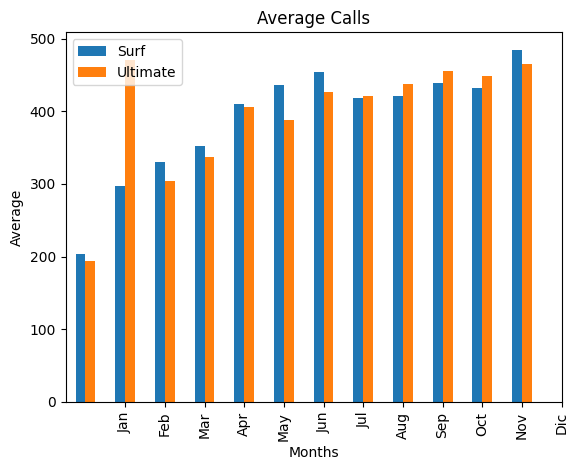

In [34]:
#unir DF
mean_min=pd.concat([mean_minutes_surf_plan,mean_minutes_ult_plan],axis=1)
mean_min.columns=["Surf","Ultimate"]
#Graficar
mean_min.plot(kind="bar")
plt.title('Average Calls')
plt.xlabel('Months')
plt.ylabel('Average')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])
plt.show()

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Plan Surf
min_surf_2=total_data_base[total_data_base["usd_monthly_pay"]==20]
mean_minutes_surf_plan_2=min_surf_2.groupby("total_minutes").agg(total_min=("month","count"))
#Plan Ultimate
min_ult_2=total_data_base[total_data_base["usd_monthly_pay"]==70]
mean_minutes_ult_plan_2=min_ult_2.groupby("total_minutes").agg(total_min=("month","count"))

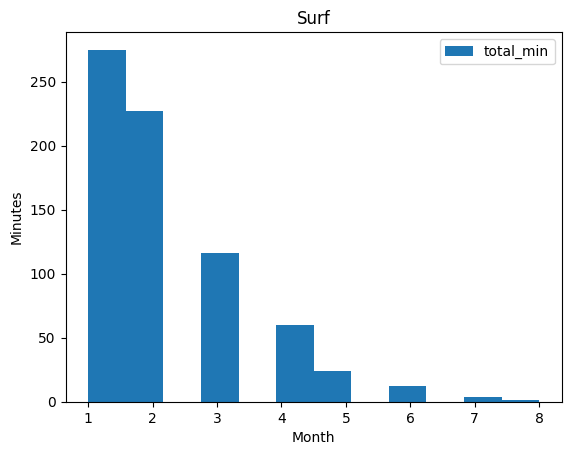

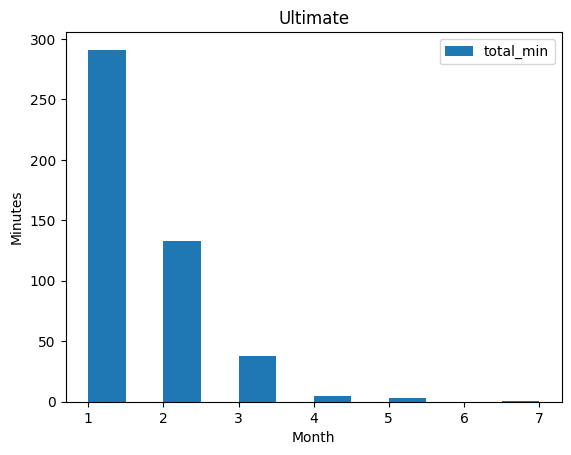

In [36]:
# Graficar histograma Surf
mean_minutes_surf_plan_2.plot(kind='hist',bins=12)
plt.title('Surf')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()
# Graficar histpgrama Ultimate
mean_minutes_ult_plan_2.plot(kind='hist',bins=12)
plt.title('Ultimate')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente inicio de proyecto. Has organizado de forma clara la carga, inspección, corrección y enriquecimiento de los datos, además de preparar un conjunto consolidado listo para el análisis de ingresos. Tu enfoque estructurado facilitará una comparación efectiva entre las tarifas. </div>

In [39]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Surf
duration_monthly_surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
duration_monthly_surf_2=duration_monthly_surf["total_minutes"]
#MediaSurf
mean_min_monthly_surf=duration_monthly_surf_2.mean()
#Varianza Surf
variance_min_monthly_surf=np.var(duration_monthly_surf_2)
print("Promedio de Plan Surf:",mean_min_monthly_surf)
print("Varianza de Plan Surf:",variance_min_monthly_surf)

Promedio de Plan Surf: 436.51974110032364
Varianza de Plan Surf: 52537.03666530514


In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Ultimate
duration_monthly_ult=total_data_base[total_data_base["usd_monthly_pay"]==70]
duration_monthly_ult_2=duration_monthly_ult["total_minutes"]
#Media Ultimate
mean_min_monthly_ult=duration_monthly_ult_2.mean()
#Varianza Surf
variance_min_monthly_ult=np.var(duration_monthly_ult_2)
print("Promedio de plan Ultimate:",mean_min_monthly_ult)
print("Varianza de Plan Ultimate:",variance_min_monthly_ult)

Promedio de plan Ultimate: 434.67601683029454
Varianza de Plan Ultimate: 56494.28633925359


AxesSubplot(0.125,0.11;0.775x0.77)

AxesSubplot(0.125,0.11;0.775x0.77)


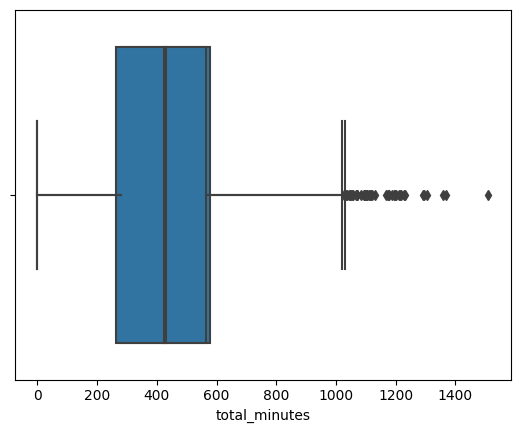

In [41]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

print(sns.boxplot(duration_monthly_surf_2))
print()
print(sns.boxplot(duration_monthly_ult_2))


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Tienen el mismo promedio de duración de llamadas pero su varianza es grande con datos atipicos

### Mensajes

In [42]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#Plan Surf
mssg_surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
n_mssg_surf=mssg_surf.groupby("month")["total_messages"].count()
#Plan Ultimate
mssg_ult=total_data_base[total_data_base["usd_monthly_pay"]==70]
n_mssg_ult=mssg_ult.groupby("month")["total_messages"].count()
#Unir
n_messages_monthly=pd.concat([n_mssg_surf,n_mssg_ult],axis=1)
n_messages_monthly.columns=["Surf","Ultimate"]
n_messages_monthly

,Surf,Ultimate
month,,
1,1,3
2,5,6
3,16,7
4,36,16
5,56,21
6,73,38
7,91,47
8,124,57
9,151,71


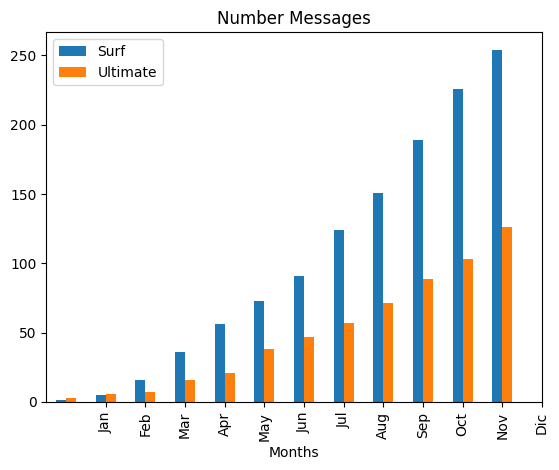

In [43]:
#Graficar número de mensajes mensuales por tipo de plan

n_messages_monthly.plot(kind="bar")
plt.title('Number Messages')
plt.xlabel('Months')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])
plt.show()

### Internet

In [44]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Plan Surf
internet_surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
gb_internet_surf=internet_surf.groupby("month")["gb_used"].count()
#Plan Ultimate
internet_ult=total_data_base[total_data_base["usd_monthly_pay"]==70]
gb_internet_ult=internet_ult.groupby("month")["gb_used"].count()
#Unir
gb_internet_monthly=pd.concat([gb_internet_surf,gb_internet_ult],axis=1)
gb_internet_monthly.columns=["Surf","Ultimate"]
gb_internet_monthly

,Surf,Ultimate
month,,
1,2,4
2,9,7
3,23,12
4,49,21
5,76,29
6,95,47
7,120,59
8,159,71
9,193,86


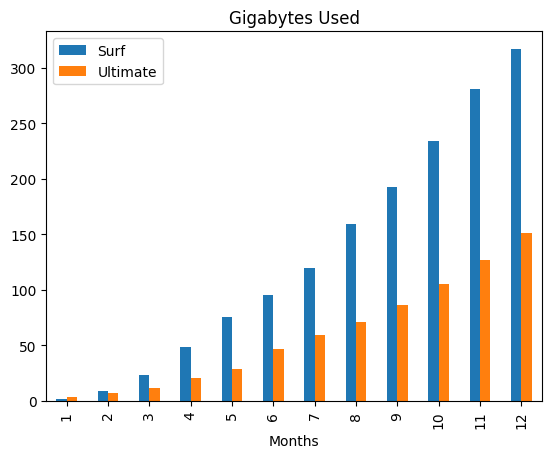

In [45]:
#Graficar GB de internet usados mensualmente por plan
gb_internet_monthly.plot(kind="bar")
plt.title('Gigabytes Used')
plt.xlabel('Months')
#plt.ylabel('Average')
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])
plt.show()

In [46]:
mean_gb_used_surf=gb_internet_surf.mean()
var_gb_used_surf=np.var(gb_internet_surf)
print("Promedio de GB usados mensualmente de plan Surf:",mean_gb_used_surf)
print("Varianza de los GB usados mensualmente de plan Surf:",var_gb_used_surf)

Promedio de GB usados mensualmente de plan Surf: 129.83333333333334
Varianza de los GB usados mensualmente de plan Surf: 10555.972222222223


In [47]:
mean_gb_used_ult=gb_internet_ult.mean()
var_gb_used_ult=np.var(gb_internet_ult)
print("Promedio de GB usados mensualmente de plan Ultimate:",mean_gb_used_ult)
print("Varianza de los GB usados mensualmente de plan Ultimate:",var_gb_used_ult)

Promedio de GB usados mensualmente de plan Ultimate: 59.916666666666664
Varianza de los GB usados mensualmente de plan Ultimate: 2207.7430555555557


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

El comportamiento en el consumo de internet entre los dos distintos planes es diferente. Tienen diferente media y diferente varianza

## Ingreso

In [48]:
#Ingreso mensual con Surf
surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
user_surf=surf.groupby(["user_id"])["usd_monthly_pay"].count()
n_surf=user_surf.size
print("Numero de usuarios para plan surf:",n_surf)
n_users_surf=n_surf
users_surf=n_users_surf*20 #dolares mensuales
users_surf=users_surf*12 #12 meses al año
users_surf

Numero de usuarios para plan surf: 333


79920

In [49]:
#Ingreso extra para Surf
extra_surf=total_data_base[total_data_base["usd_monthly_pay"]==20]
extra_totals_surf=total_data_base["extra_charge_month"].sum()
users_totals_surf=users_surf+extra_totals_surf
print("Ingreso mensual Surf:", users_surf,"dolares")
print("Ingreso extra Surf:",users_totals_surf,"dolares")
print("Ingreso total Surf:",users_surf+users_totals_surf, "dolares")


Ingreso mensual Surf: 79920 dolares
Ingreso extra Surf: 128912.69 dolares
Ingreso total Surf: 208832.69 dolares


In [50]:
#Ingreso mensual con Ultimate
ultimate=total_data_base[total_data_base["usd_monthly_pay"]==70]
user_ult=ultimate.groupby(["user_id"])["usd_monthly_pay"].count()
n_ult=user_ult.size
print("Numero de usuarios para plan Ultimate:",n_ult)
n_users_ult=n_ult
users_ult=n_users_ult*70 #dolares mensuales
users_ult=users_ult*12 #meses al año
users_ult

Numero de usuarios para plan Ultimate: 157


131880

In [51]:
#Ingreso extra para Ultimate
extra_ult=total_data_base[total_data_base["usd_monthly_pay"]==70]
extra_totals_ult=total_data_base["extra_charge_month"].sum()
users_totals_ult=users_ult+extra_totals_ult
print("Ingreso mensual Ultimate:", users_ult,"dolares")
print("Ingreso extra Ultimate:",users_totals_ult,"dolares")
print("Ingreso total Ultimate:",users_ult+users_totals_ult, "dolares")

Ingreso mensual Ultimate: 131880 dolares
Ingreso extra Ultimate: 180872.69 dolares
Ingreso total Ultimate: 312752.69 dolares


In [52]:
#Promedios
#Promedio de ingreso Surf
surf_mean_total=users_surf+users_totals_surf
surf_mean_total=surf_mean_total/12
print("Ingreso promedio para Surf:",surf_mean_total,"dolares")
#Promedio de ingreso Ultimate
ult_mean_total=users_ult+users_totals_ult
ult_mean_total=ult_mean_total/12
print("Ingreso promedio para Ultimate:",ult_mean_total,"dolares")


Ingreso promedio para Surf: 17402.724166666667 dolares
Ingreso promedio para Ultimate: 26062.724166666667 dolares


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes

En promedio el plan Ultimate genera más ingresos que el plan Surf

## Prueba las hipótesis estadísticas

In [53]:
# Prueba las hipótesis
surf_info=total_data_base[total_data_base["usd_monthly_pay"]==20].dropna()
plan_surf=surf_info["extra_charge_month"]+surf_info["usd_monthly_pay"].dropna()
plan_surf
#ultimate_info
ult_info=total_data_base[total_data_base["usd_monthly_pay"]==70].dropna()
plan_ult=ult_info["extra_charge_month"]+ult_info["usd_monthly_pay"].dropna()
plan_ult
#Prueba ttest.ind
alpha=0.05
result=st.ttest_ind(plan_surf,plan_ult, equal_var=False)
print("valor p:",result.pvalue)
if result.pvalue < alpha:
    print("Rechazamos hipotesis nula")
else:
    print("No podemos rechazar hipótesis nula")
    
    
print("Varianza para Surf:",np.var(plan_surf))
print("Varianza para Ultimate:",np.var(plan_ult))

valor p: 0.08353697879469639
No podemos rechazar hipótesis nula
Varianza para Surf: 2538.4712474203607
Varianza para Ultimate: 5.583333333333333


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

No se tiene usuarios registrados para el área NY-NJ

In [54]:
# Prueba las hipótesis
area_ny_nj=total_data_base[total_data_base["city"]=="NY-NJ"]
area_ny_nj

,user_id,month,total_calls,total_minutes,total_messages,gb_used,first_name,last_name,age,city,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_minutes,add_charge_minutes,extra_mssg,add_charge_mssg,add_charge_internet,extra_charge_month


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Se analizo el comportamiento de los usuarios para dos tipos de plan telefonico diferentes. El consumo promedio vario entre planes y a lo largo de los meses, sin embargo la prueba estadística nos indica que no hay diferencias entre los planes (no se rechazo hipótesis nula), sin embargo la varianza del plan Ultimate es grande.

# Comentario general del revisor

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Felicidades! El proyecto está aprobado. Has demostrado una gran capacidad para limpiar, transformar y analizar datos de manera efectiva, aplicando razonamientos sólidos y utilizando herramientas estadísticas apropiadas. Tu enfoque analítico y tu estructura clara son reflejo de un excelente trabajo. </div>